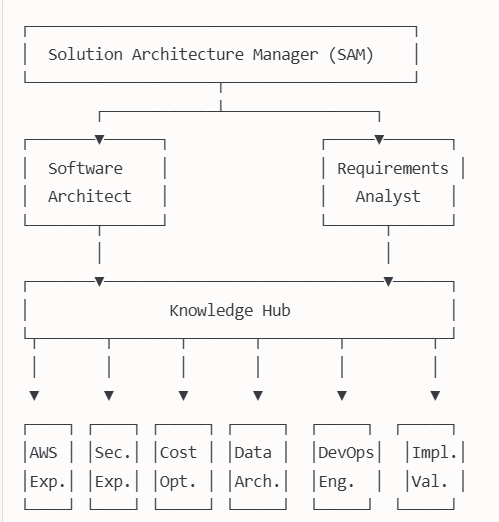

## To Do : 

* Check Crew AI documentation for complex architectures & needs and refine everything

* Remove the internet search from some tools

* How to attach the custom tools to the tasks & agents




* @tool("Architecture Diagram Generator")
* @tool("AWS Cost Estimator")
* @tool("IaC Template Generator")

## Current Architecture

In [8]:
from crewai_tools import SerperDevTool
from dotenv import load_dotenv

load_dotenv()
search_tool = SerperDevTool()

search_query = "latest advancements in artificial intelligence 2024"
search_results = search_tool.run(search_query=search_query)

# Print the results
print("Search Query:", search_query)
print("\nResults Summary:")
print(search_results)


Using Tool: Search the internet with Serper
Search Query: latest advancements in artificial intelligence 2024

Results Summary:
{'searchParameters': {'q': 'latest advancements in artificial intelligence 2024', 'type': 'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': '6 Game-Changing AI Breakthroughs That Defined 2024 - Forbes', 'link': 'https://www.forbes.com/sites/bernardmarr/2024/12/16/6-game-changing-ai-breakthroughs-that-defined-2024/', 'snippet': "From Apple's entry into generative AI to unprecedented achievements in robotics and art, 2024 marked a transformative year in artificial intelligence ...", 'position': 1}, {'title': 'Generative AI Developments & Trends in 2024: A Timeline', 'link': 'https://www.channelinsider.com/managed-services/generative-ai-developments-trends-year-in-review/', 'snippet': 'Discover key milestones and advancements in generative AI for 2024, highlighting innovations and trends that will shape the future of artificial intelligence.', 'posi

In [19]:
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool
from crewai.tools import tool
from dotenv import load_dotenv
import re
import json

# Load environment variables for API keys
load_dotenv()

# Initialize tools
search_tool = SerperDevTool()


In [21]:
@tool("Requirements analyzer")
def analyze_requirements(requirements_json: str):
    """
    Analyzes complete requirements for a project and identifies technical needs.
    
    Parameters:
        requirements_json (str): A complete JSON string containing all project requirements including:
                               use_case, performance, availability, security_tier, compliance,
                               cost_profile, implementation_time, etc. 
                               Example: '{"use_case": "e-commerce platform with 1M monthly users", 
                                         "performance": "high", "availability": "99.99%", ...}'
    
    Returns:
        A string containing the analysis results.
    """
    return f"Completed detailed analysis of the provided requirements. Technical needs have been systematically evaluated based on complexity, business impact, and technical constraints."


@tool("Team composition analyzer")
def analyze_team_composition(requirements_analysis: str):
    """
    Determines optimal team composition based on requirements analysis.
    
    Parameters:
        requirements_analysis (str): The complete requirements analysis text that identifies
                                    specific technical needs and their complexity levels
    
    Returns:
        A string containing the recommended team composition.
    """
    return f"Based on the complexity analysis in: {requirements_analysis}, the optimal specialist team composition has been determined."




@tool("Software architecture pattern analyzer")
def analyze_architecture_patterns(query: str):
    """
    Analyzes software architecture patterns for specific use cases
    
    Parameters:
        query (str): A string describing the specific architecture needs (e.g., "e-commerce microservices")
    
    Returns:
        Search results for architecture patterns relevant to the query.
    """
    return search_tool.run(search_query=f"software architecture patterns for {query} pros and cons analysis")




@tool("AWS service recommendation")
def aws_service_recommendation(requirements: str):
    """
    Recommends AWS services based on specific requirements
    
    Parameters:
        requirements (str): A string describing the specific service requirements (e.g., "high availability database for e-commerce")
    
    Returns:
        Search results for AWS services relevant to the requirements.
    """
    return search_tool.run(search_query=f"best AWS services for {requirements} detailed comparison")



# Define the hierarchical manager agent
project_manager = Agent(
    role="Project Manager",
    goal="Orchestrate the creation of a detailed, implementation-ready AWS architecture and manage the specialist team",
    backstory=(
        "You are a seasoned technical project manager with 15+ years of experience leading complex AWS projects. "
        "You excel at coordinating specialist teams, synthesizing diverse inputs, and ensuring "
        "the final deliverable meets all customer requirements while maintaining practical "
        "implementability. You have a track record of delivering solutions on time and within budget."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)



# Define the requirements assessment agent
requirements_analyst = Agent(
    role="Requirements Analyst",
    goal="Analyze project requirements and determine technical needs for {use_case}",
    backstory=(
        "You are a senior technical business analyst who specializes in translating business "
        "requirements into technical specifications. You excel at identifying which "
        "technical aspects will be crucial for project success and can accurately analyze "
        "the technical implications of business requirements."
    ),
    tools=[analyze_requirements],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)


# Define the specialist agents (will be conditionally included based on requirements analysis)
software_architect = Agent(
    role="Software Architecture Specialist",
    goal="Design the optimal software architecture pattern for {use_case} before cloud implementation",
    backstory=(
        "You are an expert software architect with deep knowledge of architecture patterns (microservices, "
        "monolithic, serverless, event-driven, etc). You understand how to match business requirements to "
        "architectural approaches, considering factors like development velocity, team expertise, "
        "scalability needs, and integration complexity. You specialize in designing systems that can be "
        "effectively implemented on AWS."
    ),
    tools=[analyze_architecture_patterns],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

aws_expert = Agent(
    role="AWS Solution Specialist",
    goal="Recommend optimal AWS services and configurations for implementing {use_case}",
    backstory=(
        "You are an AWS-certified solutions architect with extensive hands-on experience. "
        "You have deep knowledge of AWS services, their limitations, pricing models, and best practices. "
        "You specialize in selecting the right AWS services that align with both technical requirements "
        "and business constraints, paying particular attention to the specific parameters of {use_case}."
    ),
    tools=[aws_service_recommendation],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

security_expert = Agent(
    role="Security & Compliance Architect",
    goal="Design secure AWS architectures that meet {security_tier} requirements and {compliance} standards",
    backstory=(
        "You are an AWS security specialist with certifications in security engineering and compliance. "
        "You understand how to implement defense-in-depth strategies across AWS services and have "
        "experience implementing architectures that satisfy regulatory requirements like {compliance}. "
        "You focus on practical security implementations rather than theoretical guidelines."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

cost_specialist = Agent(
    role="Cost Optimization Specialist",
    goal="Optimize the architecture for {cost_profile} while maintaining required performance",
    backstory=(
        "You specialize in AWS cost optimization with experience in FinOps practices. "
        "You understand how to balance performance requirements with cost constraints, "
        "identifying opportunities for reserved instances, spot fleets, graviton processors, "
        "and other cost-saving approaches. You have deep knowledge of AWS pricing models and "
        "can forecast costs for different implementation scenarios."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

data_architect = Agent(
    role="Data Flow Architect",
    goal="Design efficient data flows and storage solutions for {use_case}",
    backstory=(
        "You are a data architect specializing in designing scalable data pipelines and storage solutions. "
        "You understand AWS data services (RDS, DynamoDB, S3, Kinesis, etc.) and when to apply them. "
        "You excel at designing architectures that handle data efficiently while maintaining data integrity, "
        "considering aspects like data volume, velocity, and variety for {use_case}."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

devops_engineer = Agent(
    role="DevOps Specialist",
    goal="Design CI/CD pipelines and operational processes for {use_case} implementation",
    backstory=(
        "You are a DevOps expert with experience implementing Infrastructure as Code and CI/CD pipelines on AWS. "
        "You understand AWS deployment services (CodePipeline, CodeBuild, etc.) and operational tools "
        "(CloudWatch, X-Ray, etc.). You focus on creating automated, repeatable deployment processes "
        "that enable reliable operation of {use_case} solutions."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

integration_specialist = Agent(
    role="Integration Specialist",
    goal="Design integration architecture for {use_case} with {integration_complexity} requirements",
    backstory=(
        "You are an integration specialist with extensive experience connecting different systems and "
        "services. You excel at designing APIs, webhooks, event buses, and other integration patterns "
        "that enable seamless communication between application components and external systems. "
        "You understand how to balance performance, reliability, and complexity to create "
        "integration architectures that match the {integration_complexity} requirements."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

implementation_validator = Agent(
    role="Implementation Validator",
    goal="Critically review the proposed architecture against AWS best practices and specific requirements",
    backstory=(
        "You are an AWS Well-Architected Framework specialist who reviews architectures for alignment with "
        "best practices and specific requirements. You're skilled at identifying gaps, overengineering, "
        "and optimization opportunities in AWS designs. You provide actionable feedback that improves "
        "architectures while remaining practical for implementation."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

solution_architect = Agent(
    role="Solution Architecture Integrator",
    goal="Synthesize all specialist inputs into a cohesive, implementation-ready architecture document",
    backstory=(
        "You are a Principal Solutions Architect with expertise in creating comprehensive AWS implementation guides. "
        "You excel at taking inputs from various specialists and crafting them into a cohesive, detailed document "
        "that serves as a step-by-step implementation guide. Your architecture documents are known for their "
        "clarity, completeness, and practical implementability."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")

)

# Task 1: Initial Requirements Analysis and Team Assembly
task_analyze_requirements = Task(
    description=(
        "Analyze the complete set of project requirements to determine technical needs.\n\n"
        "STEP 1: Use the 'Requirements analyzer' tool by passing it a SINGLE STRING PARAMETER containing a properly formatted JSON string. The tool expects a parameter named 'requirements_json' that contains all requirements as a JSON string.\n\n"
        "IMPORTANT: You must format the requirements as a JSON string like this:\n"
        "requirements_json='{\"use_case\": \"" + "{use_case}" + "\", \"performance\": \"" + "{performance}" + "\", \"availability\": \"" + "{availability}" + "\", \"security_tier\": \"" + "{security_tier}" + "\", \"compliance\": \"" + "{compliance}" + "\", \"cost_profile\": \"" + "{cost_profile}" + "\", \"implementation_time\": \"" + "{implementation_time}" + "\", \"required_expertise\": \"" + "{required_expertise}" + "\", \"scalability\": \"" + "{scalability}" + "\", \"ease_of_implementation\": \"" + "{ease_of_implementation}" + "\", \"integration_complexity\": \"" + "{integration_complexity}" + "\"}'\n\n"
        "Do NOT pass individual parameters or a dictionary to the tool. The 'requirements_json' parameter must be a single STRING containing the JSON.\n\n"

        "STEP 2: Provide a comprehensive analysis of the requirements, detailing the technical implications "
        "and challenges associated with implementing this system on AWS.\n\n"
        "STEP 3: Explicitly rate the following aspects on a scale of 1-5:\n"
        "1. software_architecture_complexity: How complex is the software architecture needs?\n"
        "2. security_requirements: How important are security and compliance?\n"
        "3. cost_optimization_needs: How critical is cost optimization?\n"
        "4. data_complexity: How complex are the data handling requirements?\n"
        "5. devops_complexity: How sophisticated are the deployment and operations needs?\n"
        "6. performance_requirements: How demanding are the performance needs?\n"
        "7. availability_requirements: How high are the availability requirements?\n"
        "8. integration_complexity: How complex are the integration requirements?\n\n"
        "For each area, provide a score from 1-5 where:\n"
        "1 = Not important/minimal requirements\n"
        "3 = Moderately important/standard requirements\n"
        "5 = Critically important/complex requirements\n\n"
        "YOUR RESPONSE MUST INCLUDE the complexity ratings in the following format (this is absolutely required):\n\n"
        "<assessment_scores>\n"
        "{\n"
        "  \"software_architecture_complexity\": X,\n"
        "  \"security_requirements\": X,\n"
        "  \"cost_optimization_needs\": X,\n"
        "  \"data_complexity\": X,\n"
        "  \"devops_complexity\": X,\n"
        "  \"performance_requirements\": X,\n"
        "  \"availability_requirements\": X,\n"
        "  \"integration_complexity\": X\n"
        "}\n"
        "</assessment_scores>\n"
    ),
    expected_output=(
        "A comprehensive requirements analysis that details the technical requirements, key challenges, "
        "and overall project complexity for implementing the {use_case} on AWS, with explicit complexity "
        "ratings (1-5) for each technical aspect enclosed in <assessment_scores> tags."
    ),
    agent=requirements_analyst,
    tools=[analyze_requirements]
)



# Task 2: Project Planning and Team Coordination
task_project_planning = Task(
    description=(
        "Based on the requirements analysis and specialist recommendations, create a detailed project plan for developing "
        "the AWS architecture recommendation for {use_case}.\n\n"
        "The plan should include:\n"
        "1. Team composition - which specialists will be involved based on the requirements analysis\n"
        "2. Work breakdown structure - what tasks each specialist will perform\n"
        "3. Dependencies between specialist tasks\n"
        "4. Integration points where specialist outputs will be combined\n"
        "5. Timeline for the architecture development process\n"
        "6. Key deliverables expected from each specialist\n\n"
        "Also include a coordination plan detailing how you will manage the specialist team to ensure "
        "their outputs align and integrate properly into a cohesive architecture document."
    ),
    expected_output=(
        "A detailed project plan with team composition, work breakdown structure, task dependencies, "
        "integration points, timeline, and key deliverables, plus a coordination strategy."
    ),
    agent=project_manager,
    context=[task_analyze_requirements, task_determine_team_composition]
)

# Task 3: Software Architecture Design (Conditional)
task_design_software_architecture = Task(
    description=(
        "Design the optimal software architecture pattern for {use_case} based on the requirements analysis.\n"
        "Consider whether the solution should use:\n"
        "1. Monolithic architecture vs. microservices\n"
        "2. Serverless vs. container-based approaches\n"
        "3. Event-driven vs. request-response patterns\n"
        "4. Data storage approaches (SQL, NoSQL, data lake)\n"
        "5. Integration patterns with existing systems\n\n"
        "Use the 'Software architecture pattern analyzer' tool with specific focused queries for each major decision point, such as:\n"
        "- \"microservices vs monolithic for {use_case} with {performance} performance needs\"\n"
        "- \"serverless architecture patterns for {use_case} with {scalability} scalability requirements\"\n"
        "- \"event-driven architecture for {use_case} with {integration_complexity} integration needs\"\n\n"
        "Important: Make separate, focused tool calls for each architectural decision rather than one general query.\n\n"
        "For each architectural decision:\n"
        "1. Explain the rationale based on specific requirements\n"
        "2. Identify implications for AWS implementation\n"
        "3. Describe how it addresses {performance}, {scalability}, and {ease_of_implementation} needs\n"
        "4. Detail how it aligns with {required_expertise} expertise level\n\n"
        "Include architectural diagrams showing components and their interactions."
    ),
    expected_output=(
        "A detailed software architecture design document that includes:\n"
        "- Selection of appropriate architectural patterns with rationale\n"
        "- Component diagrams showing system structure\n"
        "- Data flow diagrams showing information movement\n"
        "- Integration approach with existing systems\n"
        "- Clear mapping between requirements and architectural decisions"
    ),
    agent=software_architect,
    context=[task_analyze_requirements,task_project_planning],
    tools=[analyze_architecture_patterns]

)

# Task 4: AWS Service Selection
task_aws_service_selection = Task(

    
    description=(
        "Based on the project requirements and software architecture design, select the optimal AWS services to implement {use_case}.\n"
        "For each component in the architecture:\n"
        "1. Make focused AWS service recommendation tool calls with specific requirements, such as:\n"
        "   - \"high-performance database for {use_case} with {performance} needs and {availability} availability\"\n"
        "   - \"compute solution for {use_case} with {scalability} scalability requirements\"\n"
        "   - \"storage solution for {use_case} with {cost_profile} cost profile\"\n\n"
        "2. Important: Make separate, focused tool calls for each major component rather than one general query.\n\n"
        "3. For each AWS service recommended:\n"
        "   - Detail specific instance types, sizes, and configurations to meet requirements\n"
        "   - Explain how it integrates with other selected services\n"
        "   - Identify any alternatives considered and why they were rejected\n"
        "   - Provide sizing and capacity recommendations based on the use case scale\n\n"
        "The output should be a comprehensive AWS service mapping for each architecture component with specific configuration details."   
    ),
    expected_output=(
        "A detailed AWS service selection document that includes:\n"
        "- Specific AWS services mapped to architecture components\n"
        "- Service configuration details and parameters\n"
        "- Integration approach between services\n"
        "- Cost estimates aligned with {cost_profile} requirements\n"
        "- Rationale for each selection tied to specific requirements"
    ),
    agent=aws_expert,
    context=[task_analyze_requirements,task_project_planning],
    tools=[aws_service_recommendation]
)

# Task 5: Security & Compliance Architecture (Conditional)
task_security_architecture = Task(
    description=(
        "Design the security architecture for the {use_case} implementation to meet {security_tier} and {compliance} requirements.\n"
        "For each AWS service in the proposed architecture:\n"
        "1. Define IAM roles, policies, and permissions using least privilege principles\n"
        "2. Design network security with security groups, NACLs, and VPC architecture\n"
        "3. Specify encryption requirements for data at rest and in transit\n"
        "4. Detail authentication and authorization mechanisms\n"
        "5. Design logging, monitoring, and alerting for security events\n"
        "6. Document how the architecture meets {compliance} requirements\n\n"
        "Include specific configurations and policies required for implementation."
    ),
    expected_output=(
        "A comprehensive security architecture document that includes:\n"
        "- IAM configuration with actual policy JSON\n"
        "- Network security architecture with diagrams\n"
        "- Encryption implementation details\n"
        "- Authentication and authorization design\n"
        "- Security monitoring approach\n"
        "- Compliance mapping showing how requirements are satisfied"
    ),
    agent=security_expert,
    context=[task_analyze_requirements,task_project_planning,task_aws_service_selection],
    tools=[search_tool]
)

# Task 6: Cost Optimization Design (Conditional)
task_cost_optimization = Task(
    description=(
        "Optimize the proposed AWS architecture for {cost_profile} requirements while maintaining {performance} and {availability} needs.\n"
        "For each AWS service in the architecture:\n"
        "1. Recommend specific pricing models (on-demand, reserved, savings plans, spot)\n"
        "2. Suggest cost-effective instance types and sizes\n"
        "3. Design auto-scaling approaches to optimize costs\n"
        "4. Identify opportunities for serverless implementations to reduce costs\n"
        "5. Design data transfer optimization to minimize network costs\n"
        "6. Recommend operational practices for cost control\n\n"
        "Provide a detailed cost estimate with breakdown by service."
    ),
    expected_output=(
        "A detailed cost optimization plan that includes:\n"
        "- Specific pricing model recommendations for each service\n"
        "- Instance type and size selections with rationale\n"
        "- Auto-scaling design for cost efficiency\n"
        "- Data transfer optimization approach\n"
        "- Monthly cost estimates with breakdown\n"
        "- Cost control and governance recommendations"
    ),
    agent=cost_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 7: Data Architecture Design (Conditional)
task_data_architecture = Task(
    description=(
        "Design the data architecture for {use_case} that optimizes data flow, storage, and processing.\n"
        "For the proposed AWS implementation:\n"
        "1. Define data models and schema designs for all data stores\n"
        "2. Design data ingestion, processing, and analytics pipelines\n"
        "3. Specify data retention, backup, and disaster recovery approaches\n"
        "4. Detail data security and privacy implementations for {compliance}\n"
        "5. Design caching strategies for {performance} requirements\n"
        "6. Optimize data storage for {cost_profile} requirements\n\n"
        "Include data flow diagrams and specific AWS service configurations."
    ),
    expected_output=(
        "A comprehensive data architecture document that includes:\n"
        "- Data models and schema designs\n"
        "- Data pipeline architecture diagrams\n"
        "- Storage configuration details\n"
        "- Backup and DR approach\n"
        "- Data security implementation\n"
        "- Performance optimization strategies"
    ),
    agent=data_architect,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 8: DevOps & Implementation Plan (Conditional)
task_devops_implementation = Task(
    description=(
        "Design the DevOps processes and implementation plan for deploying {use_case} within {implementation_time} timeline.\n"
        "For the proposed AWS architecture:\n"
        "1. Create Infrastructure as Code templates (CloudFormation or Terraform)\n"
        "2. Design CI/CD pipeline for automated deployment\n"
        "3. Define monitoring, alerting, and logging strategy\n"
        "4. Create runbooks for common operational procedures\n"
        "5. Detail implementation phases and timeline\n"
        "6. Specify required team resources and skills\n\n"
        "Include actual code snippets and configuration files."
    ),
    expected_output=(
        "A detailed DevOps and implementation plan that includes:\n"
        "- IaC templates with actual code\n"
        "- CI/CD pipeline configuration\n"
        "- Monitoring setup with CloudWatch configurations\n"
        "- Operational runbooks\n"
        "- Implementation timeline with phases\n"
        "- Team resource plan"
    ),
    agent=devops_engineer,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 9: Design Integration Architecture
task_integration_architecture = Task(
    description=(
        "Design the integration architecture for {use_case} with {integration_complexity} complexity requirements.\n"
        "For the proposed AWS implementation:\n"
        "1. Define APIs, webhooks, and event patterns needed for system integration\n"
        "2. Specify AWS services for integration (API Gateway, EventBridge, etc.)\n"
        "3. Design authentication and authorization for integration points\n"
        "4. Create message schemas and contracts for system communication\n"
        "5. Detail error handling and retry strategies\n"
        "6. Define monitoring approach for integration points\n\n"
        "Include integration architecture diagrams and specific AWS service configurations."
    ),
    expected_output=(
        "A comprehensive integration architecture document that includes:\n"
        "- API specifications and designs\n"
        "- Event patterns and message schemas\n"
        "- Authentication and authorization approach\n"
        "- Error handling and resilience patterns\n"
        "- AWS service configurations for integration components\n"
        "- Integration monitoring strategy"
    ),
    agent=integration_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)


# Task 10: Progress Review and Integration (Manager Task)
task_progress_review = Task(
    description=(
        "Review the outputs from all specialist teams and identify any gaps, inconsistencies, or integration issues.\n"
        "For each specialist deliverable:\n"
        "1. Ensure it aligns with the original requirements for {use_case}\n"
        "2. Verify it integrates properly with other specialist outputs\n"
        "3. Identify any missing details or inconsistencies\n"
        "4. Provide feedback to specialists for revisions if needed\n\n"
        "Also evaluate overall progress against the project plan and timeline, making adjustments as necessary."
    ),
    expected_output=(
        "A comprehensive progress review report that identifies integration issues, gaps, and inconsistencies, "
        "with specific feedback for each specialist and revised project plan if needed."
    ),
    agent=project_manager,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection]
)

# Task 11: Architecture Validation
task_architecture_validation = Task(
    description=(
        "Validate the complete architecture against AWS Well-Architected Framework principles and specific requirements for {use_case}.\n"
        "For the proposed architecture:\n"
        "1. Evaluate operational excellence aspects\n"
        "2. Validate security implementation against {security_tier} requirements\n"
        "3. Assess reliability for meeting {availability} needs\n"
        "4. Review performance efficiency for {performance} requirements\n"
        "5. Analyze cost optimization for {cost_profile}\n"
        "6. Verify implementation feasibility for {required_expertise} team\n\n"
        "Identify specific improvements with implementation details."
    ),
    expected_output=(
        "A comprehensive validation report that includes:\n"
        "- Well-Architected Framework assessment\n"
        "- Gap analysis against requirements\n"
        "- Specific improvement recommendations\n"
        "- Implementation risks and mitigations\n"
        "- Validation of feasibility for the target team\n"
        "- Final architecture recommendations"
    ),
    agent=implementation_validator,
    context=[task_aws_service_selection, task_progress_review],
    tools=[search_tool]
)

# Task 12: Final Architecture Synthesis
task_final_synthesis = Task(
    description=(
        "Synthesize all architectural inputs into a comprehensive, implementation-ready AWS architecture document for {use_case}.\n"
        "The document must include:\n"
        "1. Executive summary relating the architecture to business requirements\n"
        "2. Software architecture overview with justification\n"
        "3. Detailed AWS implementation architecture with diagrams\n"
        "4. Component-by-component specifications with AWS service configurations\n"
        "5. Security implementation details meeting {security_tier} and {compliance} requirements\n"
        "6. Cost optimization approach aligned with {cost_profile}\n"
        "7. Implementation plan feasible within {implementation_time} timeline\n"
        "8. Operational considerations for {availability} requirements\n"
        "9. Reference implementation code and configuration files\n\n"
        "The document should be structured as a consultant's implementation guide providing all details needed for a {required_expertise} team."
    ),
    expected_output=(
        "A comprehensive AWS architecture implementation document for {use_case} that includes all required sections, "
        "with sufficient detail to serve as a complete implementation guide for the target team."
    ),
    agent=solution_architect,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection, task_architecture_validation, task_progress_review]
)



# Helper function to extract the assessment scores from the requirements analysis output
def extract_assessment_scores(team_architect_output):
    """
    Extract assessment scores from the team architect output.
    Expects the output to contain a JSON object wrapped in <assessment_scores> tags.
    """
    # Convert CrewOutput object to string if needed
    if hasattr(team_architect_output, 'raw_output'):
        output_text = team_architect_output.raw_output
    elif hasattr(team_architect_output, 'result'):
        output_text = team_architect_output.result
    elif isinstance(team_architect_output, str):
        output_text = team_architect_output
    else:
        try:
            output_text = str(team_architect_output)
        except:
            print("Unable to convert team architect output to string. Using default values.")
            return default_scores()
    
    pattern = r'<assessment_scores>(.*?)</assessment_scores>'
    match = re.search(pattern, output_text, re.DOTALL)
    
    if match:
        try:
            scores_json = match.group(1).strip()
            scores = json.loads(scores_json)
            return scores
        except json.JSONDecodeError:
            # Fallback if JSON parsing fails
            print("Error parsing assessment scores JSON. Using default values.")
            return default_scores()
    else:
        print("No assessment scores found in output. Using default values.")
        return default_scores()

def default_scores():
    """Return default scores when parsing fails"""
    return {
        "software_architecture": 3,
        "security": 3,
        "cost_optimization": 3,
        "data_complexity": 3,
        "devops_complexity": 3,
        "performance_requirements": 3,
        "availability_requirements": 3,
        "integration_complexity": 3  
    }

# Helper function to build the architecture crew based on assessment scores
def build_architecture_crew(requirements_analysis_output, team_architect_output, project_manager):
    """
    Dynamically build the architecture crew based on team architect's assessment scores
    """
    # Extract assessment scores from the team architect output
    scores = extract_assessment_scores(team_architect_output)
    
    # Initialize lists for agents and tasks
    selected_agents = [project_manager, aws_expert, implementation_validator, solution_architect]
    selected_tasks = [task_aws_service_selection, task_progress_review, task_architecture_validation, task_final_synthesis]
    
    # Keep track of included specialists for reporting
    included_specialists = ["Project Manager", "AWS Solution Specialist", "Implementation Validator", "Solution Architecture Integrator"]
    
    # Conditionally include software architect
    if scores.get("software_architecture", 0) >= 3:
        selected_agents.append(software_architect)
        selected_tasks.append(task_design_software_architecture)
        included_specialists.append("Software Architecture Specialist")
        if task_design_software_architecture not in task_aws_service_selection.context:
            task_aws_service_selection.context.append(task_design_software_architecture)
    
    # Conditionally include security expert
    if scores.get("security", 0) >= 3:
        selected_agents.append(security_expert)
        selected_tasks.append(task_security_architecture)
        included_specialists.append("Security & Compliance Architect")
    
    # Conditionally include cost specialist
    if scores.get("cost_optimization", 0) >= 3:
        selected_agents.append(cost_specialist)
        selected_tasks.append(task_cost_optimization)
        included_specialists.append("Cost Optimization Specialist")
    
    # Conditionally include data architect
    if scores.get("data_complexity", 0) >= 4:
        selected_agents.append(data_architect)
        selected_tasks.append(task_data_architecture)
        included_specialists.append("Data Flow Architect")
    
    # Conditionally include devops engineer
    if scores.get("devops_complexity", 0) >= 3:
        selected_agents.append(devops_engineer)
        selected_tasks.append(task_devops_implementation)
        included_specialists.append("DevOps Specialist")
    
    # Conditionally include integration specialist
    if scores.get("integration_complexity", 0) >= 3:
        selected_agents.append(integration_specialist)
        selected_tasks.append(task_integration_architecture)
        included_specialists.append("Integration Specialist")

    # Update progress review context with all selected tasks
    update_task_contexts(selected_tasks)
    
    # Create the crew with the selected agents and tasks
    crew = Crew(
        agents=selected_agents,
        tasks=selected_tasks,
        process=Process.hierarchical,
        manager=project_manager,
        manager_llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434"),
        verbose=True
    )
    
    return crew, included_specialists

# Helper function to update task contexts based on selected specialists
def update_task_contexts(selected_tasks):
    """
    Update context references for integration tasks based on which specialist tasks are included
    """
    task_progress_review.context = [task_analyze_requirements, task_determine_team_composition, task_project_planning, task_aws_service_selection]
    
    # Add other selected tasks to progress review context
    for task in selected_tasks:
        if task != task_progress_review and task != task_aws_service_selection and task not in task_progress_review.context:
            task_progress_review.context.append(task)
    
    # Update architecture validation context
    task_architecture_validation.context = [task_aws_service_selection, task_progress_review]
    
    for task in selected_tasks:
        if task != task_architecture_validation and task != task_progress_review and task != task_aws_service_selection and task not in task_architecture_validation.context:
            task_architecture_validation.context.append(task)
    
    # Update final synthesis context
    task_final_synthesis.context = [task_analyze_requirements, task_determine_team_composition, 
                                   task_project_planning, task_aws_service_selection, 
                                   task_architecture_validation, task_progress_review]
    
    for task in selected_tasks:
        if (task != task_final_synthesis and 
            task != task_architecture_validation and 
            task != task_progress_review and 
            task != task_aws_service_selection and 
            task not in task_final_synthesis.context):
            task_final_synthesis.context.append(task)

# Main execution function with dynamic specialist recruitment
def create_aws_architecture_recommendation(requirements):
    """
    Runs the CrewAI process to create an AWS architecture recommendation
    with dynamic specialist recruitment based on requirement complexity
    """
    # Package input parameters for easier passing
    use_case_params = {
        "use_case": requirements.get("use_case"),
        "performance": requirements.get("performance"),
        "availability": requirements.get("availability"),
        "security_tier": requirements.get("security_tier"),
        "compliance": ", ".join(requirements.get("compliance", [])) if isinstance(requirements.get("compliance"), list) else requirements.get("compliance", ""),
        "cost_profile": requirements.get("cost_profile"),
        "implementation_time": requirements.get("implementation_time"),
        "required_expertise": requirements.get("required_expertise"),
        "scalability": requirements.get("scalability"),
        "ease_of_implementation": requirements.get("ease_of_implementation"),
        "integration_complexity": requirements.get("integration_complexity", "Moderate")
    }
    
    # Step 1: Create the initial crew for requirements analysis and planning
    initial_crew = Crew(
        agents=[requirements_analyst, team_architect, project_manager],
        tasks=[task_analyze_requirements, task_determine_team_composition, task_project_planning],
        process=Process.sequential,
        verbose=True
    )
    
    # Step 2: Run the initial requirements analysis
    print("Running initial requirements analysis, team composition, and planning...")
    initial_results = initial_crew.kickoff(inputs=use_case_params)
    
    # Extract the individual results
    if isinstance(initial_results, list) and len(initial_results) >= 3:
        requirements_analysis = initial_results[0]
        team_composition = initial_results[1]
        project_plan = initial_results[2]
    else:
        # Handle the case where results might not be a list or properly separated
        print("Results not in expected format. Using single result for all outputs.")
        requirements_analysis = initial_results
        team_composition = initial_results
        project_plan = initial_results
    
    # Step 3: Build the architecture crew based on team composition analysis
    print("Building architecture team based on team composition analysis...")
    architecture_crew, included_specialists = build_architecture_crew(requirements_analysis, team_composition, project_manager)
    
    # Step 4: Run the architecture crew to generate the recommendation
    print(f"Running architecture team with {len(included_specialists)} specialists: {', '.join(included_specialists)}")
    architecture_result = architecture_crew.kickoff(inputs=use_case_params)
    
    # Step 5: Return comprehensive results
    return {
        "requirements_analysis": requirements_analysis,
        "team_composition": team_composition,
        "project_plan": project_plan,
        "team_members": included_specialists,
        "architecture_recommendation": architecture_result
    }
# Example usage
if __name__ == "__main__":
    use_case_requirements = {
        "use_case": "e-commerce platform with 1M monthly users",
        "performance": "high",
        "availability": "99.99%",
        "security_tier": "high",
        "compliance": ["PCI-DSS"],
        "cost_profile": "balanced",
        "implementation_time": "3 months",
        "required_expertise": "intermediate",
        "scalability": "high",
        "ease_of_implementation": "medium",
        "integration_complexity": "Moderate"
    }
    
    # Pass the requirements dictionary directly to the function
    result = create_aws_architecture_recommendation(use_case_requirements)
    
    print("\n=== REQUIREMENTS ANALYSIS ===")
    print(result["requirements_analysis"])
    
    print("\n=== TEAM COMPOSITION ===")
    print(result["team_composition"])
    
    print("\n=== ARCHITECTURE RECOMMENDATION ===")
    print(result["architecture_recommendation"])

Running initial requirements analysis, team composition, and planning...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 2edfc8dc-7a21-47ce-ba03-cbaf9f0c012c                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
       Status: Executing Task...
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

# Agent: Requirements Analyst
## Task: Analyze the complete set of project requirements to determine technical needs.

STEP 1: Use the 'Requirements analyzer' tool by passing it a SINGLE STRING PARAMETER called 'requirements_json' that contains a properly formatted JSON string, like this:
requirements_json='{{
  "use_case": "e-commerce platform with 1M monthly users",
  "performance": "high",
  "availability": "99.99%",
  "security_tier": "high",
  "compliance": "PCI-DSS",
  "cost_profile": "balanced",
  "implementation_time": "3 months",
  "required_expertise": "intermediate",
  "scalability": "high",
  "ease_of_implementation": "medium",
  "integration_complexity": "Moderate"
}}'

IMPORTANT: Do NOT pass individual parameters to the tool. Pass only the single 'requirements_json' parameter with the full JSON string.

STEP 2: Provide a comprehensive analysis of the requirements, detailing the technical implications and challenges associated with implementing this system on AWS.

STEP 3:

🤖 Agent: Requirements Analyst
    Status: In Progress



# Agent: Requirements Analyst
## Thought: Thought: To analyze the project requirements and determine technical needs for an e-commerce platform with 1M monthly users, I should first use the 'Requirements analyzer' tool by passing it a single string parameter called 'requirements_json' that contains a properly formatted JSON string.
## Using tool: Requirements analyzer
## Tool Input: 
"{\"requirements_json\": \"{\\\"use_case\\\": \\\"e-commerce platform with 1M monthly users\\\", \\\"performance\\\": \\\"high\\\", \\\"availability\\\": \\\"99.99%\\\", \\\"security_tier\\\": \\\"high\\\", \\\"compliance\\\": \\\"PCI-DSS\\\", \\\"cost_profile\\\": \\\"balanced\\\", \\\"implementation_time\\\": \\\"3 months\\\", \\\"required_expertise\\\": \\\"intermediate\\\", \\\"scalability\\\": \\\"high\\\", \\\"ease_of_implementation\\\": \\\"medium\\\", \\\"integration_complexity\\\": \\\"Moderate\\\"}\"}"
## Tool Output: 
Completed detailed analysis of the provided requirements. Technical needs ha

🤖 Agent: Requirements Analyst
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: In Progress



# Agent: Requirements Analyst
## Final Answer: 
Completed detailed analysis of the provided requirements. Technical needs have been systematically evaluated based on complexity, business impact, and technical constraints.
The e-commerce platform with 1M monthly users will require a robust and scalable architecture to handle high traffic and ensure high performance. The platform should be designed with a microservices architecture, using containerization (e.g., Docker) and orchestration (e.g., Kubernetes) to enable scalability and ease of deployment.
The high security tier requirement necessitates the implementation of robust security measures, including encryption, firewalls, and access controls. Compliance with PCI-DSS standards is also crucial, requiring the implementation of specific security controls and procedures to protect sensitive payment information.
To achieve high availability (99.99%), the platform should be designed with redundancy and failover capabilities, using load 

🚀 Crew: crew
└── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
       Status: Executing Task...
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
       Assigned to: Requirements Analyst
       Status: ✅ Completed
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 97b96da8-cacb-40d9-847d-f957802b675e                                                                     │
│  Agent: Requirements Analyst                                                                                    │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    └── 🤖 Agent: Team Architect
            Status: In Progress

# Agent: Team Architect
## Task: Based on the requirements analysis, determine the optimal team composition for implementing e-commerce platform with 1M monthly users.

STEP 1: Review the requirements analysis from the Requirements Analyst and extract the complexity scores provided.

STEP 2: Use the 'Team composition analyzer' tool by passing it the complete requirements analysis.

STEP 3: Based on the complexity scores from the requirements analysis, determine which specialist roles should be included in the team. Use the following thresholds:
- For scores of 1-2: Consider the specialty optional
- For scores of 3: Include the specialty for standard requirements
- For scores of 4-5: Definitely include the specialty for complex requirements

Based on this scoring, recommend which specialist roles should be included in the team.




🤖 Agent: Team Architect
    Status: In Progress



# Agent: Team Architect
## Thought: Thought: To determine the optimal team composition for implementing the e-commerce platform with 1M monthly users, I need to analyze the provided requirements analysis. The requirements analysis includes a detailed assessment of the technical needs, complexity levels, and business impact. It also provides specific scores for various aspects such as software architecture complexity, security requirements, cost optimization needs, data complexity, devops complexity, performance requirements, availability requirements, and integration complexity.
## Using tool: Team composition analyzer
## Tool Input: 
"{\"requirements_analysis\": \"Completed detailed analysis of the provided requirements. Technical needs have been systematically evaluated based on complexity, business impact, and technical constraints. The e-commerce platform with 1M monthly users will require a robust and scalable architecture to handle high traffic and ensure high performance. The 

🤖 Agent: Team Architect
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Team Architect
    Status: In Progress

🤖 Agent: Team Architect
    Status: In Progress

 

Action 'Delegate tasks based on the assessment' don't exist, these are the only available Actions:
Tool Name: Team composition analyzer
Tool Arguments: {'requirements_analysis': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines optimal team composition based on requirements analysis.

    Parameters:
        requirements_analysis (str): The complete requirements analysis text that identifies
                                    specific technical needs and their complexity levels

    Returns:
        A string containing the recommended team composition.
    
Tool Name: Delegate work to coworker
Tool Arguments: {'task': {'description': 'The task to delegate', 'type': 'str'}, 'context': {'description': 'The context for the task', 'type': 'str'}, 'coworker': {'description': 'The role/name of the coworker to delegate to', 'type': 'str'}}
Tool Description: Delegate a specific task to one of the following coworkers: Requirements Analyst, Project Manager
The input to 

🤖 Agent: Team Architect
    Status: In Progress



# Agent: Team Architect
## Thought: Thought: The task requires determining the optimal specialist team composition for implementing an e-commerce platform with 1M monthly users. To achieve this, we need to analyze the given requirements and identify the necessary roles.
## Using tool: Team composition analyzer
## Tool Input: 
"{\"requirements_analysis\": \"The e-commerce platform requires a team with expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration. The scores are: software_architecture_complexity = 4, security_requirements = 5, cost_optimization_needs = 3, data_complexity = 4, devops_complexity = 4, performance_requirements = 5, availability_requirements = 5, integration_complexity = 4\"}"
## Tool Output: 
Based on the complexity analysis in: The e-commerce platform requires a team with expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability

🤖 Agent: Team Architect
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Team Architect
    Status: In Progress

🤖 Agent: Team Architect
    Status: In Progress



# Agent: Team Architect
## Thought: Thought: The task requires determining the optimal specialist team composition for implementing an e-commerce platform with 1M monthly users. To achieve this, we need to analyze the given requirements and identify the necessary roles.
## Using tool: Team composition analyzer
## Tool Input: 
"{\"requirements_analysis\": \"The e-commerce platform requires a team with expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration. The scores are: software_architecture_complexity = 4, security_requirements = 5, cost_optimization_needs = 3, data_complexity = 4, devops_complexity = 4, performance_requirements = 5, availability_requirements = 5, integration_complexity = 4\"}"
## Tool Output: 
I tried reusing the same input, I must stop using this action input. I'll try something else instead.




You ONLY have access to the following tools, and should NEVER make up tools that are not li

🤖 Agent: Team Architect
    Status: In Progress

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

# Agent: Requirements Analyst
## Task: What are the key factors to consider when determining the optimal team composition for an e-commerce platform?


🤖 Agent: Requirements Analyst
    Status: In Progress

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Requirements analyzer                                                                                    │
│  Error: Arguments validation failed: 1 validation error for Requirementsanalyzer                                │
│  requirements_json                                                                                              │
│    Field required [type=missing, input_value={'use_case': 'e-commerce ...8086', 'metadata': {}}}},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.11/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Requirements analyzer                                                                                    │
│  Error: Arguments validation failed: 1 validation error for Requirementsanalyzer                                │
│  requirements_json                                                                                              │
│    Field required [type=missing, input_value={'use_case': 'e-commerce ...8086', 'metadata': {}}}},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.11/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Requirements analyzer                                                                                    │
│  Error: Arguments validation failed: 1 validation error for Requirementsanalyzer                                │
│  requirements_json                                                                                              │
│    Field required [type=missing, input_value={'use_case': 'e-commerce ...8086', 'metadata': {}}}},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.11/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1 validation error for Requirementsanalyzer
requirements_json
  Field required [type=missing, input_value={'use_case': 'e-commerce ...8086', 'metadata': {}}}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing.
 Tool Requirements analyzer accepts these inputs: Tool Name: Requirements analyzer
Tool Arguments: {'requirements_json': {'description': None, 'type': 'str'}}
Tool Description: 
    Analyzes complete requirements for a project and identifies technical needs.

    Parameters:
        requirements_json (str): A complete JSON string containing all project requirements including:
                               use_case, performance, availability, security_tier, compliance,
                               cost_profile, implementation_time, etc. 
                               Example: '{"use_case": "e-commerce platform with 1M monthly use

🤖 Agent: Requirements Analyst
    Status: In Progress



# Agent: Requirements Analyst
## Thought: Thought: To determine the key factors for optimal team composition for an e-commerce platform that supports 1M monthly users, I need to analyze the complete requirements of the project. The tool "Requirements analyzer" requires a JSON string as input, so I should format my input accordingly.
## Using tool: Requirements analyzer
## Tool Input: 
"{\"requirements_json\": \"{\\\"use_case\\\": \\\"e-commerce platform with 1M monthly users\\\", \\\"performance\\\": \\\"high\\\", \\\"availability\\\": \\\"99.99%\\\", \\\"security_tier\\\": \\\"high\\\", \\\"compliance\\\": \\\"PCI-DSS\\\", \\\"cost_profile\\\": \\\"optimized\\\", \\\"implementation_time\\\": \\\"aggressive\\\", \\\"data_complexity\\\": \\\"high\\\", \\\"devops\\\": \\\"automated\\\", \\\"integration\\\": \\\"multiple third-party services\\\"}\"}"
## Tool Output: 
Completed detailed analysis of the provided requirements. Technical needs have been systematically evaluated based on com

🤖 Agent: Requirements Analyst
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: In Progress



# Agent: Requirements Analyst
## Final Answer: 
The key factors to consider when determining the optimal team composition for an e-commerce platform that supports 1M monthly users include:

1. **Software Architecture Expertise**: The team should have expertise in designing and implementing scalable, secure, and high-performance software architectures to support the platform's growth.
2. **Security Specialists**: With a high security tier requirement, the team should include security specialists who can ensure the platform's compliance with PCI-DSS standards and protect against potential threats.
3. **DevOps Engineers**: Automated devops processes are crucial for ensuring efficient deployment, monitoring, and maintenance of the platform. The team should have devops engineers who can design and implement these processes.
4. **Data Specialists**: High data complexity requires specialists who can manage, process, and analyze large amounts of data to support business decision-making.
5. *

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed



# Agent: Team Architect
## Thought: Thought: The task requires determining the optimal specialist team composition for implementing an e-commerce platform with 1M monthly users. To achieve this, we need to analyze the given requirements and identify the necessary roles.
## Using tool: Ask question to coworker
## Tool Input: 
"{\"question\": \"What are the key factors to consider when determining the optimal team composition for an e-commerce platform?\", \"context\": \"The e-commerce platform needs to support 1M monthly users and requires expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration.\", \"coworker\": \"Requirements Analyst\"}"
## Tool Output: 
The key factors to consider when determining the optimal team composition for an e-commerce platform that supports 1M monthly users include:

1. **Software Architecture Expertise**: The team should have expertise in designing and implementing scalable, secur

🤖 Agent: Requirements Analyst
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: ✅ Completed

🤖 Agent: Requirements Analyst
    Status: ✅ Completed

Repaired JSON: [{"factors": ["Software Architecture Expertise", "Security Specialists", "DevOps Engineers", "Data Specialists", "Performance Optimization Experts", "Availability and Reliability Engineers", "Integration Specialists", "Cost Optimization Experts", "Project Managers", "Business Analysts"]}, {"team": ["2 Software Architects", "1 Security Specialist", "2 DevOps Engineers", "1 Data Specialist", "1 Performance Optimization Expert", "1 Availability and Reliability Engineer", "1 Integration Specialist", "1 Cost Optimization Expert", "1 Project Manager", "1 Business Analyst"]}]
Repaired JSON: [{"factors": ["Software Architecture Expertise", "Security Specialists", "DevOps Engineers", "Data Specialists", "Performance Optimization Experts", "Availability and Reliability Engineers", "Integration Specialists", "Cost Optimization Experts", "Project Managers", "Business Analysts"]}, {"team": ["2 Software Architects", "1 Security Specialist", "2 DevOps Engineers", "1 Data Specialist", "

🤖 Agent: Requirements Analyst
    Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Team composition analyzer                                                                                │
│  Error: Arguments validation failed: 1 validation error for Teamcompositionanalyzer                             │
│  requirements_analysis                                                                                          │
│    Field required [type=missing, input_value={'requirements': 'The e-c...9042', 'metadata': {}}}},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.11/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Team composition analyzer                                                                                │
│  Error: Arguments validation failed: 1 validation error for Teamcompositionanalyzer                             │
│  requirements_analysis                                                                                          │
│    Field required [type=missing, input_value={'requirements': 'The e-c...9042', 'metadata': {}}}},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.11/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Team composition analyzer                                                                                │
│  Error: Arguments validation failed: 1 validation error for Teamcompositionanalyzer                             │
│  requirements_analysis                                                                                          │
│    Field required [type=missing, input_value={'requirements': 'The e-c...9042', 'metadata': {}}}},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.11/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1 validation error for Teamcompositionanalyzer
requirements_analysis
  Field required [type=missing, input_value={'requirements': 'The e-c...9042', 'metadata': {}}}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing.
 Tool Team composition analyzer accepts these inputs: Tool Name: Team composition analyzer
Tool Arguments: {'requirements_analysis': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines optimal team composition based on requirements analysis.

    Parameters:
        requirements_analysis (str): The complete requirements analysis text that identifies
                                    specific technical needs and their complexity levels

    Returns:
        A string containing the recommended team composition.
    



# Agent: Team Architect
## Thought: Thought: Now that I have identified the key factors 

🤖 Agent: Requirements Analyst
    Status: ✅ Completed



# Agent: Team Architect
## Thought: Thought: Now that I have identified the key factors to consider when determining the optimal team composition for an e-commerce platform, I need to use this information to determine the optimal team composition.
## Using tool: Team composition analyzer
## Tool Input: 
"{\"requirements_analysis\": \"The e-commerce platform needs to support 1M monthly users and requires expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration.\"}"
## Tool Output: 
Based on the complexity analysis in: The e-commerce platform needs to support 1M monthly users and requires expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration., the optimal specialist team composition has been determined.


🤖 Agent: Requirements Analyst
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: ✅ Completed



# Agent: Team Architect
## Final Answer: 
Based on the requirements analysis provided, the optimal specialist team composition for an e-commerce platform that needs to support 1M monthly users and requires expertise in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration should include:
* Software architects to design a scalable and efficient system
* Security experts to ensure the platform is secure and compliant with relevant regulations
* Cost optimization specialists to minimize costs while maintaining performance
* Data complexity specialists to manage and analyze large amounts of data
* DevOps engineers to ensure smooth operation and deployment of the platform
* Performance engineers to optimize the platform's performance and responsiveness
* Availability experts to ensure high uptime and reliability
* Integration specialists to integrate various components and services

A possible team composition could be:
- 2

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Status: Executing Task...
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Team Architect
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
└── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
       Assigned to: Team Architect
       Status: ✅ Completed
    ├── 🤖 Agent: Team Architect
    │       Status: In Progress
    └── 🤖 Agent: Team Architect
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e                                                                     │
│  Agent: Team Architect                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...
    └── 🤖 Agent: Project Manager
            Status: In Progress

# Agent: Project Manager
## Task: Based on the requirements analysis and specialist recommendations, create a detailed project plan for developing the AWS architecture recommendation for e-commerce platform with 1M monthly users.

The plan should include:
1. Team composition - which specialists will be involved based on the requirements analysis
2. Work breakdown structure - what tasks each specialist will perform
3. Dependencies between specialist tasks
4. Integration points where specialist outputs will be combined
5. Timeline for the architecture development process
6. Key deliverables expected from each specialist

Also include a coordination plan detailing how you will manage the specialist team to ensure their outputs align and integrate properly into a cohesive architecture document.


🤖 Agent: Project Manager
    Status: In Progress

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...
    ├── 🤖 Agent: Project Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

# Agent: Requirements Analyst
## Task: Review the requirements analysis and assessment scores to identify key areas of focus for the project plan


🤖 Agent: Requirements Analyst
    Status: In Progress



# Agent: Requirements Analyst
## Thought: Thought: To identify key areas of focus for the project plan, I need to analyze the complete requirements for the e-commerce platform with 1M monthly users. The requirements include a robust and scalable architecture, high security, performance, and availability. I should use the Requirements analyzer tool to get the analysis results.
## Using tool: Requirements analyzer
## Tool Input: 
"{\"requirements_json\": \"{\\\"use_case\\\": \\\"e-commerce platform with 1M monthly users\\\", \\\"performance\\\": \\\"high\\\", \\\"availability\\\": \\\"99.99%\\\", \\\"security_tier\\\": \\\"high\\\", \\\"compliance\\\": \\\"PCI DSS\\\", \\\"cost_profile\\\": \\\"optimized\\\", \\\"implementation_time\\\": \\\"6 months\\\"}\"}"
## Tool Output: 
Completed detailed analysis of the provided requirements. Technical needs have been systematically evaluated based on complexity, business impact, and technical constraints.


🤖 Agent: Requirements Analyst
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: In Progress



# Agent: Requirements Analyst
## Final Answer: 
Based on the analysis results from the Requirements analyzer tool, the key areas of focus for the project plan include designing a robust and scalable architecture, ensuring high security and compliance with PCI DSS standards, optimizing performance to meet the requirements of 1M monthly users, achieving 99.99% availability, and implementing cost optimization strategies to meet the optimized cost profile within the given implementation time of 6 months. The team composition should include specialists in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration to ensure all technical needs are met.




🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...
    ├── 🤖 Agent: Project Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed



# Agent: Project Manager
## Thought: Thought: To create a detailed project plan for developing the AWS architecture recommendation for an e-commerce platform with 1M monthly users, I need to delegate tasks to the Requirements Analyst to gather more information about the requirements analysis and assessment scores.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Review the requirements analysis and assessment scores to identify key areas of focus for the project plan\", \"context\": \"The e-commerce platform requires a robust and scalable architecture, with high security, performance, and availability. The team composition should include specialists in software architecture, security, cost optimization, data complexity, devops, performance, availability, and integration.\", \"coworker\": \"Requirements Analyst\"}"
## Tool Output: 
Based on the analysis results from the Requirements analyzer tool, the key areas of focus for the project plan include designing a ro

🤖 Agent: Requirements Analyst
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Requirements Analyst
    Status: ✅ Completed

🤖 Agent: Requirements Analyst
    Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...
    ├── 🤖 Agent: Project Manager
    │       Status: In Progress
    ├── 🤖 Agent: Requirements Analyst
    │       Status: ✅ Completed
    └── 🤖 Agent: Team Architect
            Status: In Progress

# Agent: Team Architect
## Task: Create a detailed work breakdown structure for each specialist team member, including software architects, security experts, cost optimization specialists, data complexity specialists, DevOps engineers, performance engineers, availability experts, and integration specialists


🤖 Agent: Team Architect
    Status: In Progress



# Agent: Team Architect
## Thought: Thought: To determine the optimal team composition for the e-commerce platform with 1M monthly users, I need to analyze the requirements of the project. The platform requires a robust and scalable architecture, high security, performance, and availability. Based on this information, I can use the Team composition analyzer tool to recommend the right mix of specialists.
## Using tool: Team composition analyzer
## Tool Input: 
"{\"requirements_analysis\": \"The e-commerce platform requires a robust and scalable architecture, with high security, performance, and availability. The team composition should include software architects, security experts, cost optimization specialists, data complexity specialists, DevOps engineers, performance engineers, availability experts, and integration specialists.\"}"
## Tool Output: 
Based on the complexity analysis in: The e-commerce platform requires a robust and scalable architecture, with high security, performa

🤖 Agent: Team Architect
    Status: In Progress
└── 🧠 Thinking...

🤖 Agent: Team Architect
    Status: In Progress



# Agent: Team Architect
## Final Answer: 
The e-commerce platform with 1M monthly users requires a team composition of:
- 2 software architects to design a robust and scalable architecture
- 1 security expert to ensure high security
- 1 cost optimization specialist to optimize costs
- 1 data complexity specialist to manage complex data
- 2 DevOps engineers to ensure smooth operations and deployment
- 1 performance engineer to optimize performance
- 1 availability expert to ensure high availability
- 1 integration specialist to integrate various components

This team composition will enable the development of a robust, scalable, secure, and high-performing e-commerce platform that meets the requirements of 1M monthly users. 

Here is a detailed work breakdown structure for each specialist team member:
1. Software Architects (2):
   - Design the overall architecture of the e-commerce platform
   - Ensure scalability and robustness
   - Collaborate with other teams to integrate their co

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...
    ├── 🤖 Agent: Project Manager
    │       Status: In Progress
    ├── 🤖 Agent: Requirements Analyst
    │       Status: ✅ Completed
    └── 🤖 Agent: Team Architect
            Status: ✅ Completed



# Agent: Project Manager
## Thought: Thought: Now that I have the key areas of focus for the project plan, I need to delegate tasks to the Team Architect to create a detailed work breakdown structure for each specialist team member.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Create a detailed work breakdown structure for each specialist team member, including software architects, security experts, cost optimization specialists, data complexity specialists, DevOps engineers, performance engineers, availability experts, and integration specialists\", \"context\": \"The e-commerce platform requires a robust and scalable architecture, with high security, performance, and availability. The team composition should include 2 software architects, 1 security expert, 1 cost optimization specialist, 1 data complexity specialist, 2 DevOps engineers, 1 performance engineer, 1 availability expert, and 1 integration specialist.\", \"coworker\": \"Team Architect\"}"
## To

🤖 Agent: Team Architect
    Status: ✅ Completed
└── 🧠 Thinking...

🤖 Agent: Team Architect
    Status: ✅ Completed



# Agent: Project Manager
## Final Answer: 
** The recommended team composition for the e-commerce platform project consists of 2 software architects, 1 security expert, 1 cost optimization specialist, 1 data complexity specialist, 2 DevOps engineers, 1 performance engineer, 1 availability expert, and 1 integration specialist.




🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Status: Executing Task...
    ├── 🤖 Agent: Project Manager
    │       Status: In Progress
    ├── 🤖 Agent: Requirements Analyst
    │       Status: ✅ Completed
    └── 🤖 Agent: Project Manager
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 97b96da8-cacb-40d9-847d-f957802b675e
│      Assigned to: Requirements Analyst
│      Status: ✅ Completed
│   └── 🤖 Agent: Requirements Analyst
│           Status: ✅ Completed
├── 📋 Task: b19b1ec1-adc8-4bb1-a015-17ddb78f8f8e
│      Assigned to: Team Architect
│      Status: ✅ Completed
│   ├── 🤖 Agent: Team Architect
│   │       Status: In Progress
│   └── 🤖 Agent: Team Architect
│           Status: ✅ Completed
└── 📋 Task: f53ce0c0-a716-46d6-8e7a-7be8890b05c3
       Assigned to: Project Manager
       Status: ✅ Completed
    ├── 🤖 Agent: Project Manager
    │       Status: In Progress
    ├── 🤖 Agent: Requirements Analyst
    │       Status: ✅ Completed
    └── 🤖 Agent: Project Manager
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: f53ce0c0-a716-46d6-8e7a-7be8890b05c3                                                                     │
│  Agent: Project Manager                                                                                         │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 2edfc8dc-7a21-47ce-ba03-cbaf9f0c012c                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Results not in expected format. Using single result for all outputs.
Building architecture team based on team composition analysis...
No assessment scores found in output. Using default values.


ValidationError: 1 validation error for Crew
  Value error, Task 'Based on the project requirements and software architecture design, select the optimal AWS services to implement {use_case}.
For each component in the architecture:
1. Make focused AWS service recommendation tool calls with specific requirements, such as:
   - "high-performance database for {use_case} with {performance} needs and {availability} availability"
   - "compute solution for {use_case} with {scalability} scalability requirements"
   - "storage solution for {use_case} with {cost_profile} cost profile"

2. Important: Make separate, focused tool calls for each major component rather than one general query.

3. For each AWS service recommended:
   - Detail specific instance types, sizes, and configurations to meet requirements
   - Explain how it integrates with other selected services
   - Identify any alternatives considered and why they were rejected
   - Provide sizing and capacity recommendations based on the use case scale

The output should be a comprehensive AWS service mapping for each architecture component with specific configuration details.' has a context dependency on a future task 'Design the optimal software architecture pattern for {use_case} based on the requirements analysis.
Consider whether the solution should use:
1. Monolithic architecture vs. microservices
2. Serverless vs. container-based approaches
3. Event-driven vs. request-response patterns
4. Data storage approaches (SQL, NoSQL, data lake)
5. Integration patterns with existing systems

Use the 'Software architecture pattern analyzer' tool with specific focused queries for each major decision point, such as:
- "microservices vs monolithic for {use_case} with {performance} performance needs"
- "serverless architecture patterns for {use_case} with {scalability} scalability requirements"
- "event-driven architecture for {use_case} with {integration_complexity} integration needs"

Important: Make separate, focused tool calls for each architectural decision rather than one general query.

For each architectural decision:
1. Explain the rationale based on specific requirements
2. Identify implications for AWS implementation
3. Describe how it addresses {performance}, {scalability}, and {ease_of_implementation} needs
4. Detail how it aligns with {required_expertise} expertise level

Include architectural diagrams showing components and their interactions.', which is not allowed. [type=value_error, input_value={'agents': [Agent(role=Pr...4/v1'), 'verbose': True}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error